# Step 1: Business Understanding
Bike rental Model . Problem Statement A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal: You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Step2 : Data Preparation


In [133]:
#importing all required libraries for the project
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [134]:
# Reading the data from a CSV file
data = pd.read_csv("day.csv")

# Data Definitions
=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [135]:
# Displaying first five rows of the data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [136]:
# Checking number of rows and columns in the dataset
data.shape

(730, 16)

In [137]:
# Checking the missing values
data.isnull().sum()
# the given data doesnot have any null/missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [138]:
# Renaming the column names for better readability
data.rename(columns = {"dteday":"date","yr":"year","mnth":"month","hum":"humidity","cnt":"count"}, inplace = True)
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The data Info tells us that values season, month, weekday are being represented as numerical values. For better understanding we need to update their respective datatype

In [139]:
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
# def convert_season(x):
#     if x == 1:
#         return "spring"
#     elif x == 2:
#         return "summer"
#     elif x == 3:
#         return "fall"
#     elif x == 4:
#         return "winter"  

In [140]:
# data['season'] = data['season'].apply(convert_season)
# data.head()

In [141]:
# data.season.dtype

In [142]:
# Mapping variable month, weathersit, weekday
data["season"] = data.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
# data["year"] = data.year.map({1:2019, 0:2018})
data["month"] = data.month.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5: "May", 6: "Jun", 7: "Jul", 8:"Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
data["weathersit"] = data.weathersit.map({1:"Clear", 2:"Mist + Cloudy", 3: "Light Snow", 4: "Snow + Fog"})
data["weekday"] = data.weekday.map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})

In [143]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Handling the date Field

Finding out the number if days since the first bike has been rented to get a clear idea about number of rentals made to find conclusion for our model

In [144]:
data['date'] = pd.to_datetime(data['date'], format = '%d-%m-%Y')

In [145]:
data['date'].dtype

dtype('<M8[ns]')

In [146]:
day0 = pd.to_datetime(date(2018, 1, 1))
day1 = data.date
diff = day1 - day0
data['day'] = diff

In [147]:
data['day'] = data['day'].astype(str)
data['day'] = data['day'].map(lambda x: x[0:2])
data['day'] = data['day'].astype(int)

In [148]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [149]:
data.shape

(730, 17)

In [150]:
data.describe()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,42.164384
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,20.214226
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,25.000000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,42.000000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,58.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,99.000000


In [151]:
data.nunique().sort_values()

workingday      2
year            2
holiday         2
weathersit      3
season          4
weekday         7
month          12
day           100
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
date          730
instant       730
dtype: int64

In [152]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [153]:
data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [154]:
data.drop(['day'], axis = 1, inplace = True)

In [155]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   date        730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   year        730 non-null    int64         
 4   month       730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  humidity    730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  count       730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [157]:
data.sample(10)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
128,129,2018-05-09,summer,0,May,0,Mon,1,Clear,21.832500,26.26230,58.8750,11.792000,664,3698,4362
442,443,2019-03-19,spring,1,Mar,0,Mon,1,Clear,22.345000,26.64105,72.8750,10.875239,982,5171,6153
408,409,2019-02-13,spring,1,Feb,0,Mon,1,Clear,9.122500,11.39565,41.1250,11.207961,94,3328,3422
198,199,2018-07-18,fall,0,Jul,0,Mon,1,Clear,30.613347,35.19625,65.1250,14.458868,841,3617,4458
413,414,2019-02-18,spring,1,Feb,0,Sat,0,Clear,14.213347,17.77125,53.4583,12.792243,1435,2883,4318
330,331,2018-11-27,winter,0,Nov,0,Sun,0,Clear,18.825847,22.79000,69.8333,13.999918,810,2261,3071
703,704,2019-12-05,winter,1,Dec,0,Wed,1,Clear,17.971653,21.40060,48.5000,21.709407,331,5398,5729
314,315,2018-11-11,winter,0,Nov,1,Fri,0,Clear,13.290847,15.34085,44.6250,21.083225,440,2928,3368
716,717,2019-12-18,winter,1,Dec,0,Tue,1,Clear,16.844153,20.48540,66.6250,14.834068,433,5124,5557
464,465,2019-04-10,summer,1,Apr,0,Tue,1,Clear,18.313347,21.81165,43.5000,16.708125,819,5099,5918


In [158]:
data['month'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: month, dtype: int64

In [159]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [160]:
data.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
date          730
dtype: int64

Visualizing the Seasons data

<AxesSubplot:xlabel='season', ylabel='count'>

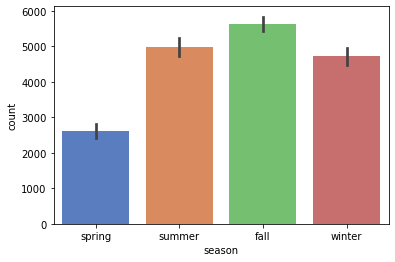

In [161]:
sns.barplot('season','count',data = data,palette="muted")

Bike rentals are more during Fall

weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:xlabel='weathersit', ylabel='count'>

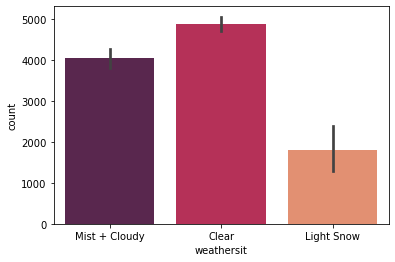

In [162]:
sns.barplot('weathersit','count', data = data, palette = "rocket")

Bikes rentals are more when weather is clear

year (0: 2018, 1:2019)

<AxesSubplot:xlabel='year', ylabel='count'>

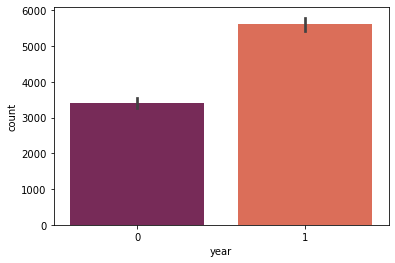

In [163]:
sns.barplot("year","count", data =  data, palette = "rocket")

Bike rentals are more in 2019 compared to 2018

Month

<AxesSubplot:xlabel='month', ylabel='count'>

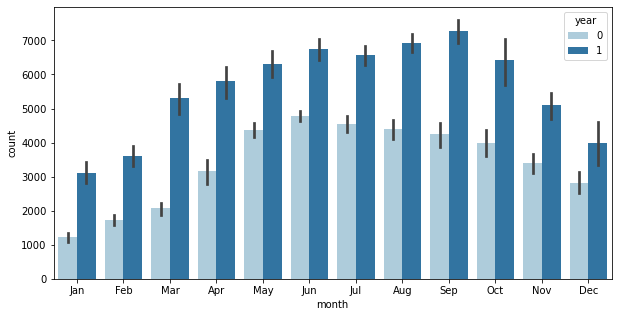

In [164]:
plt.figure(figsize=(10,5))
sns.barplot('month','count', hue = 'year', data = data, palette = 'Paired')

Temperature

<AxesSubplot:xlabel='temp', ylabel='count'>

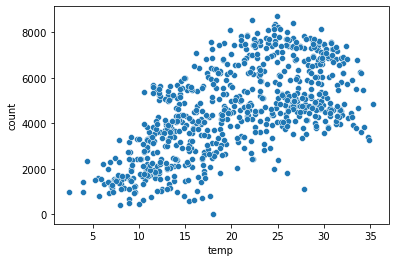

In [165]:
sns.scatterplot(x = "temp", y = "count", data = data)

Bike rentals are mostly observed at higher temperature 

Feels like temperature

<AxesSubplot:xlabel='atemp', ylabel='count'>

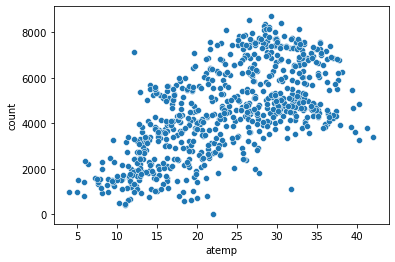

In [166]:
sns.scatterplot(x = "atemp", y = "count", data = data)

Humidity 

<AxesSubplot:xlabel='humidity', ylabel='count'>

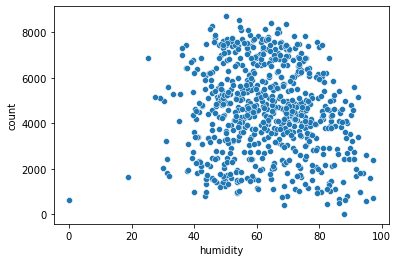

In [167]:
sns.scatterplot(x = "humidity", y = "count", data = data)

Working Day

<AxesSubplot:xlabel='workingday', ylabel='count'>

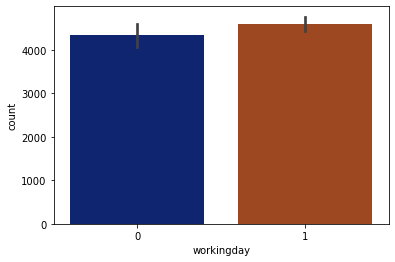

In [168]:
sns.barplot("workingday","count", data = data, palette = "dark")

Bike rentals are more during Working days

Windspeed

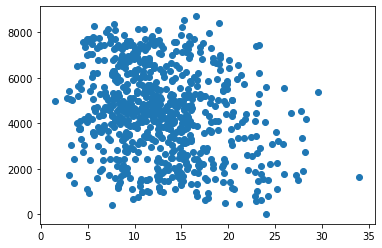

In [169]:
plt.scatter("windspeed","count",data = data)

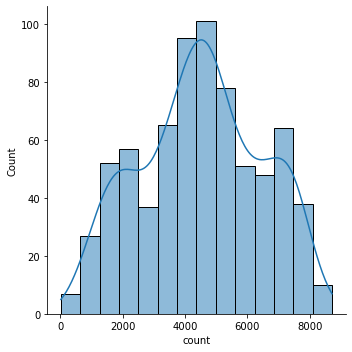

In [170]:
sns.displot(data = data, x = "count", kde = True)

Visualizing the relationship between all features

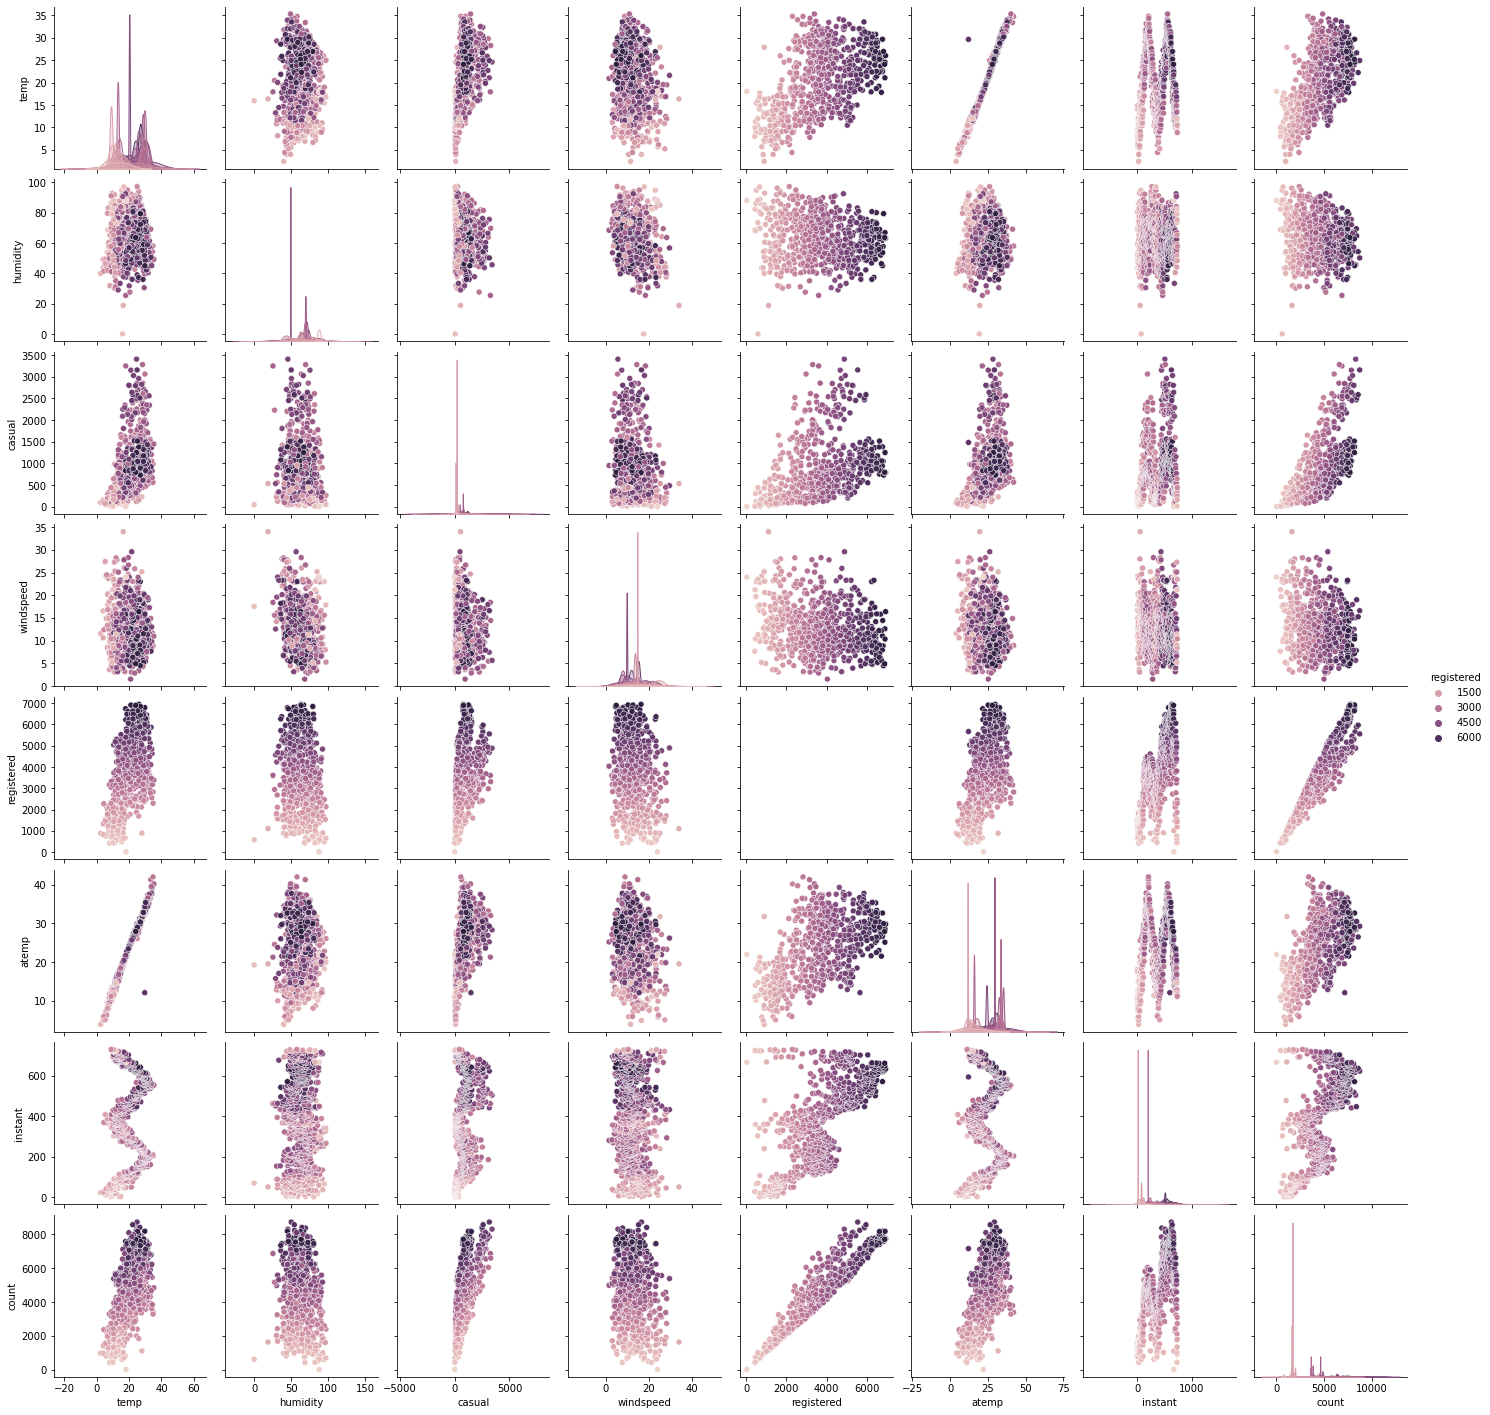

In [171]:
sns.pairplot(data, vars = ["temp", "humidity", "casual", "windspeed", "registered", "atemp", "instant", "count"], hue = "registered")

In [172]:
def create_subplot(x,index):
    plt.subplot(2,4, index)
    sns.boxplot(x = x, y = 'count', data = data)

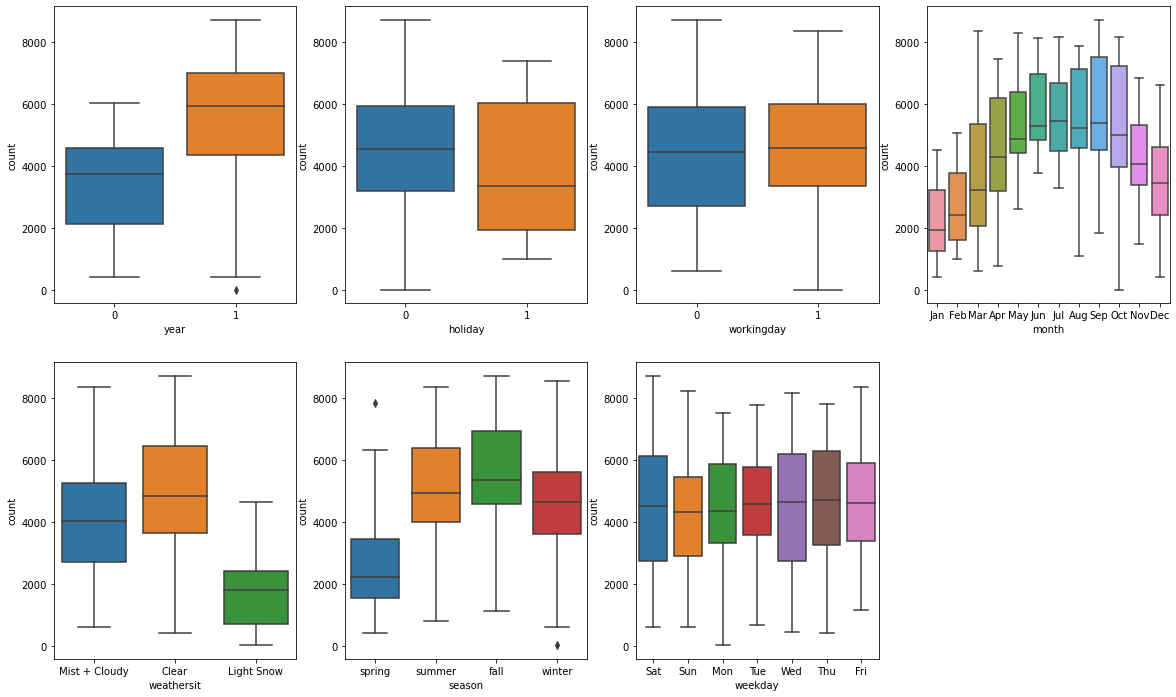

In [173]:
plt.figure(figsize = (20,12))
create_subplot('year',1)
create_subplot('holiday',2)
create_subplot('workingday',3)
create_subplot('month',4)
create_subplot('weathersit',5)
create_subplot('season',6)
create_subplot('weekday',7)

- bike rentals are more in 2019 when compared to 2018
- Bikes are mostly rented on a working day 
- There is highest count logged in for the month of Sptember
- Bike rentals seems to be higher when the weather is clear 
- highest bike rentals are recorded during the fall when compared to lowest count in the spring
- The distribution of bike rentals count seems to be similar across all the days

## HeatMap

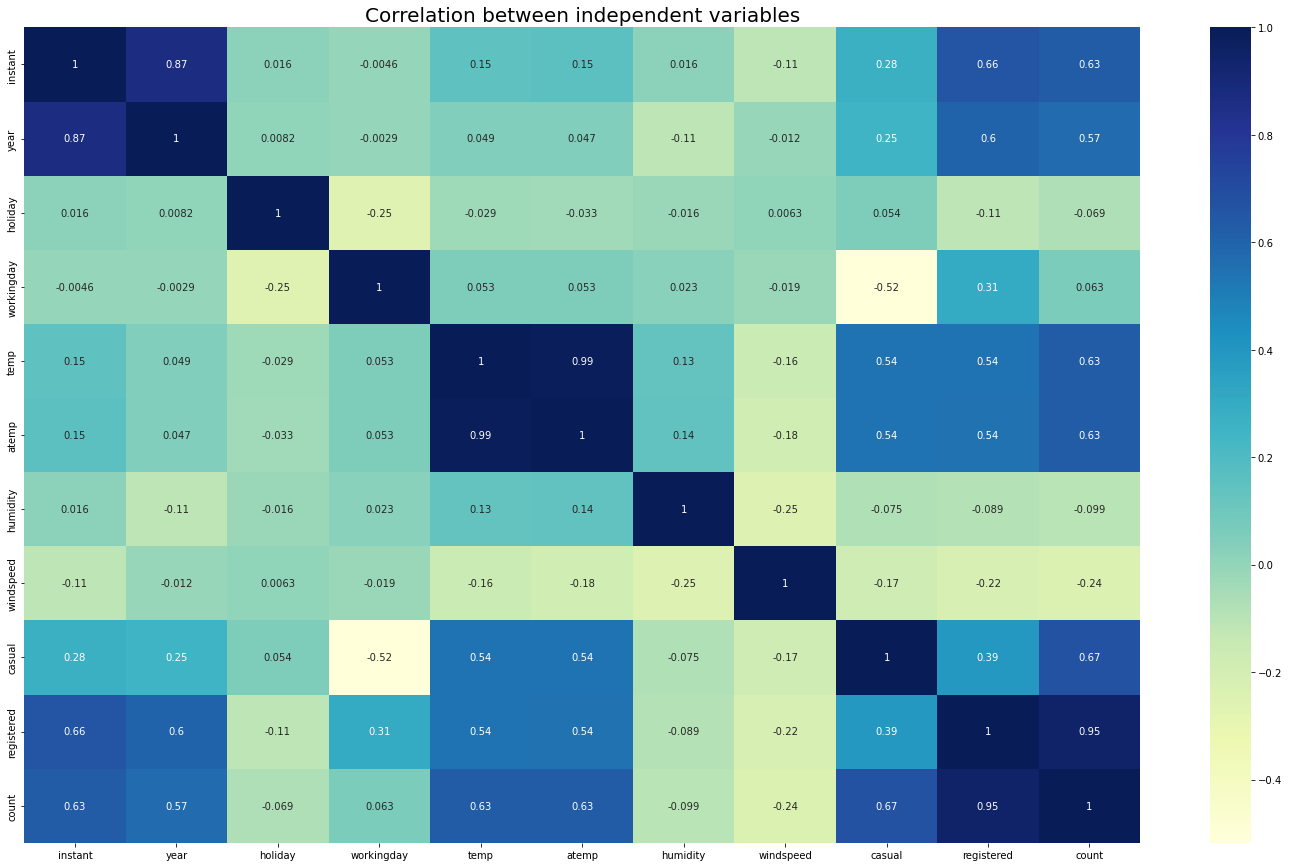

In [174]:
plt.figure(figsize= (25,15))
sns.heatmap(data.corr(), cmap="YlGnBu", annot= True)
plt.title("Correlation between independent variables", fontsize = 20)
plt.show()

- It is observed from the above pairplot and heatmap that instant, temp, atemp, casual, registered are correlated to count variable which is greater thab 0.6
- We know that atemp variable can be removed later as it is highly correlated to temp
- similarly we can remove casual and registered variables can also be removed later as count is sum of casual and registered - these can be removed while we start building our model
- the above plots help us to interpret the data well and identify the variables that are useful for m odel building and hence we can consider a Multivariable Linear regression

In [175]:
data.describe().columns

Index(['instant', 'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [176]:
num_col = data[['instant', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year']]
num_col

,instant,temp,atemp,humidity,windspeed,casual,registered,count,year
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0
...,...,...,...,...,...,...,...,...,...
725,726,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1
726,727,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1
727,728,10.386653,12.12000,75.2917,8.333661,159,1182,1341,1
728,729,10.489153,11.58500,48.3333,23.500518,364,1432,1796,1


In [177]:
x = num_col.columns
x

Index(['instant', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'year'],
      dtype='object')

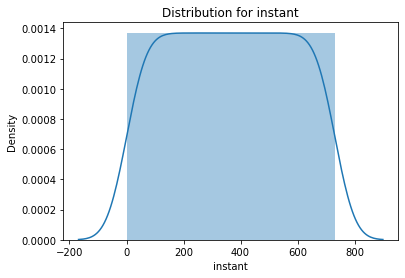

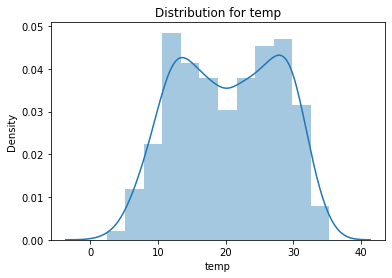

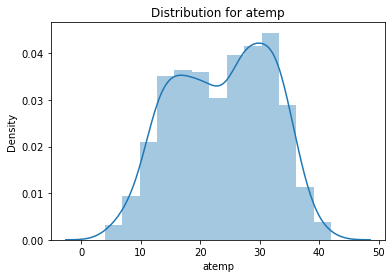

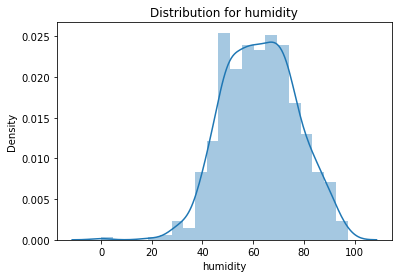

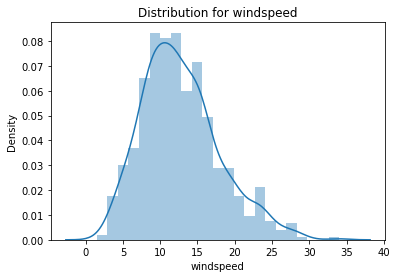

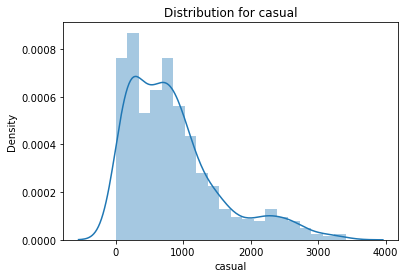

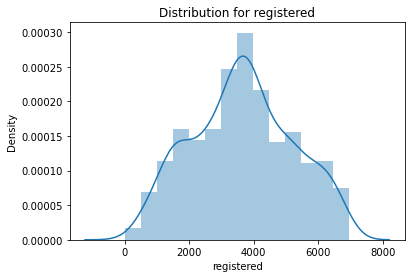

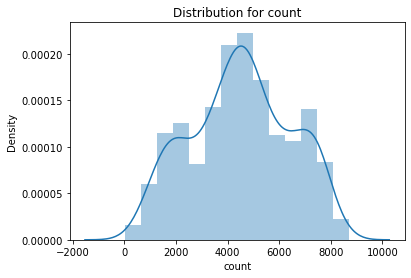

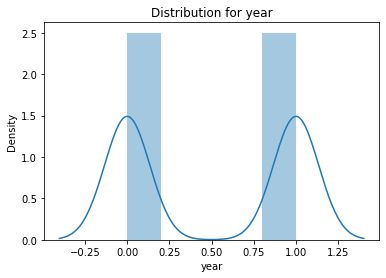

In [178]:
for i in x:
    sns.distplot(data[i])
    plt.title("Distribution for " + i)
    plt.show()
    print("===========================================================================")

From the above graphs 
- we can see that temp and atemp variables are bimodal in nature so we can eliminate one of them 
- casual and registered values sum up to count which can be eliminated further in our analysis

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   date        730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   year        730 non-null    int64         
 4   month       730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  humidity    730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  count       730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [180]:
data.dtypes

instant                int64
date          datetime64[ns]
season                object
year                   int64
month                 object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [181]:
data.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [182]:
categ_col = data[['season','year','month', 'holiday', 'weekday','workingday', 'weathersit']]
categ_col

,season,year,month,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Sat,0,Mist + Cloudy
1,spring,0,Jan,0,Sun,0,Mist + Cloudy
2,spring,0,Jan,0,Mon,1,Clear
3,spring,0,Jan,0,Tue,1,Clear
4,spring,0,Jan,0,Wed,1,Clear
...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,Mist + Cloudy
726,spring,1,Dec,0,Fri,1,Mist + Cloudy
727,spring,1,Dec,0,Sat,0,Mist + Cloudy
728,spring,1,Dec,0,Sun,0,Clear


In [183]:
categ_col.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [184]:
x

Index(['instant', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'year'],
      dtype='object')

In [185]:
x = x[1:]

In [186]:
x

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'year'],
      dtype='object')

In [187]:
data[x].head()

,temp,atemp,humidity,windspeed,casual,registered,count,year
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


In [188]:
data[x].corr()

,temp,atemp,humidity,windspeed,casual,registered,count,year
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.048789
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,0.047215
humidity,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.112547
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,-0.011624
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,0.250502
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,0.596911
count,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000,0.569728
year,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,1.000000


<AxesSubplot:>

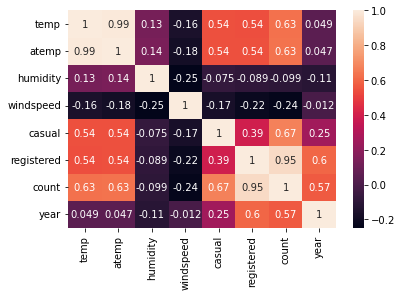

In [189]:
sns.heatmap(data[x].corr(), annot = True)

<AxesSubplot:>

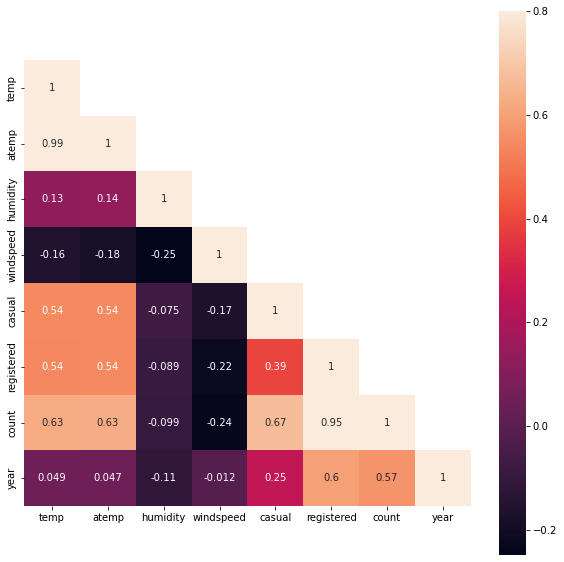

In [190]:
#plotting the heatmap by applying the masking technique
mask = np.array(data[x].corr())
# Return the indices for the lower-triangle of arr.
mask[np.tril_indices_from(mask)] = False
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(data[x].corr(), mask = mask, vmax = 0.8, square = True, annot = True)

# Step 3: Data Preparation

In [191]:
# Eliminating the columns which are nor required
data = data.drop(["instant", "date","atemp","casual","registered"], axis = 1)

In [192]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


reference : - https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [193]:
# Handling the categorical variables
data_categorical = data.select_dtypes(include = ['object'])
data_categorical.columns

Index(['season', 'month', 'weekday', 'weathersit'], dtype='object')

In [194]:
# in this step we are converting categorical values into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first = True)
# data_dummies = dummies = data_dummies.T.reindex(data_categorical).T.fillna(0)
data_dummies.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [195]:
data_dummies.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [196]:
list(data_categorical.columns)
data = data.drop(list(data_categorical.columns), axis = 1)
data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count'],
      dtype='object')

In [197]:
data_new = pd.concat([data, data_dummies], axis = 1)
data_new.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [198]:
data_new.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count', 'season_spring', 'season_summer', 'season_winter', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [199]:
data.shape

(730, 7)

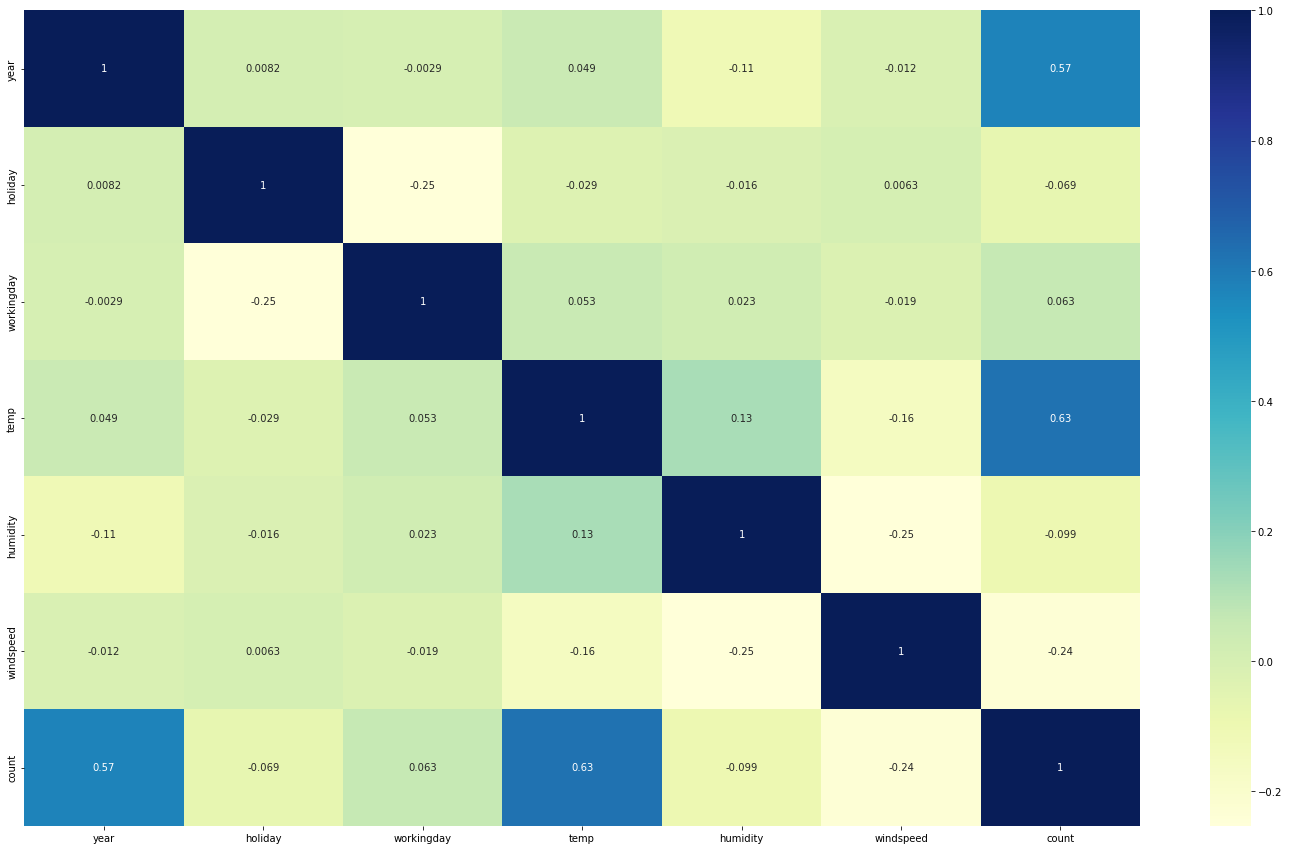

In [200]:
# Checking the correlation between the all the variables available
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), cmap = "YlGnBu", annot = True)
plt.show()

From the above we can infer that temperature and year are highly correlated to count

## Splitting the data into Train and test data sets

In [201]:
data_train, data_test = train_test_split(data_new, train_size = 0.7, random_state = 100)

In [202]:
list(data.describe().columns)

['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'count']

In [203]:
data.shape

(730, 7)

In [204]:
data_test.shape

(220, 29)

In [205]:
data_train.shape

(510, 29)

In [206]:
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [207]:
scaler = MinMaxScaler()
numerical_variables = ["temp", "humidity", "windspeed", "count"]
data_train[numerical_variables] = scaler.fit_transform(data_train[numerical_variables])
data_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [208]:
# now separating dependent and independent variables
y_train = data_train.pop("count")
x_train = data_train

In [209]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

In [210]:
x_train.head()

,year,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Checking for multicollinearity among the variables

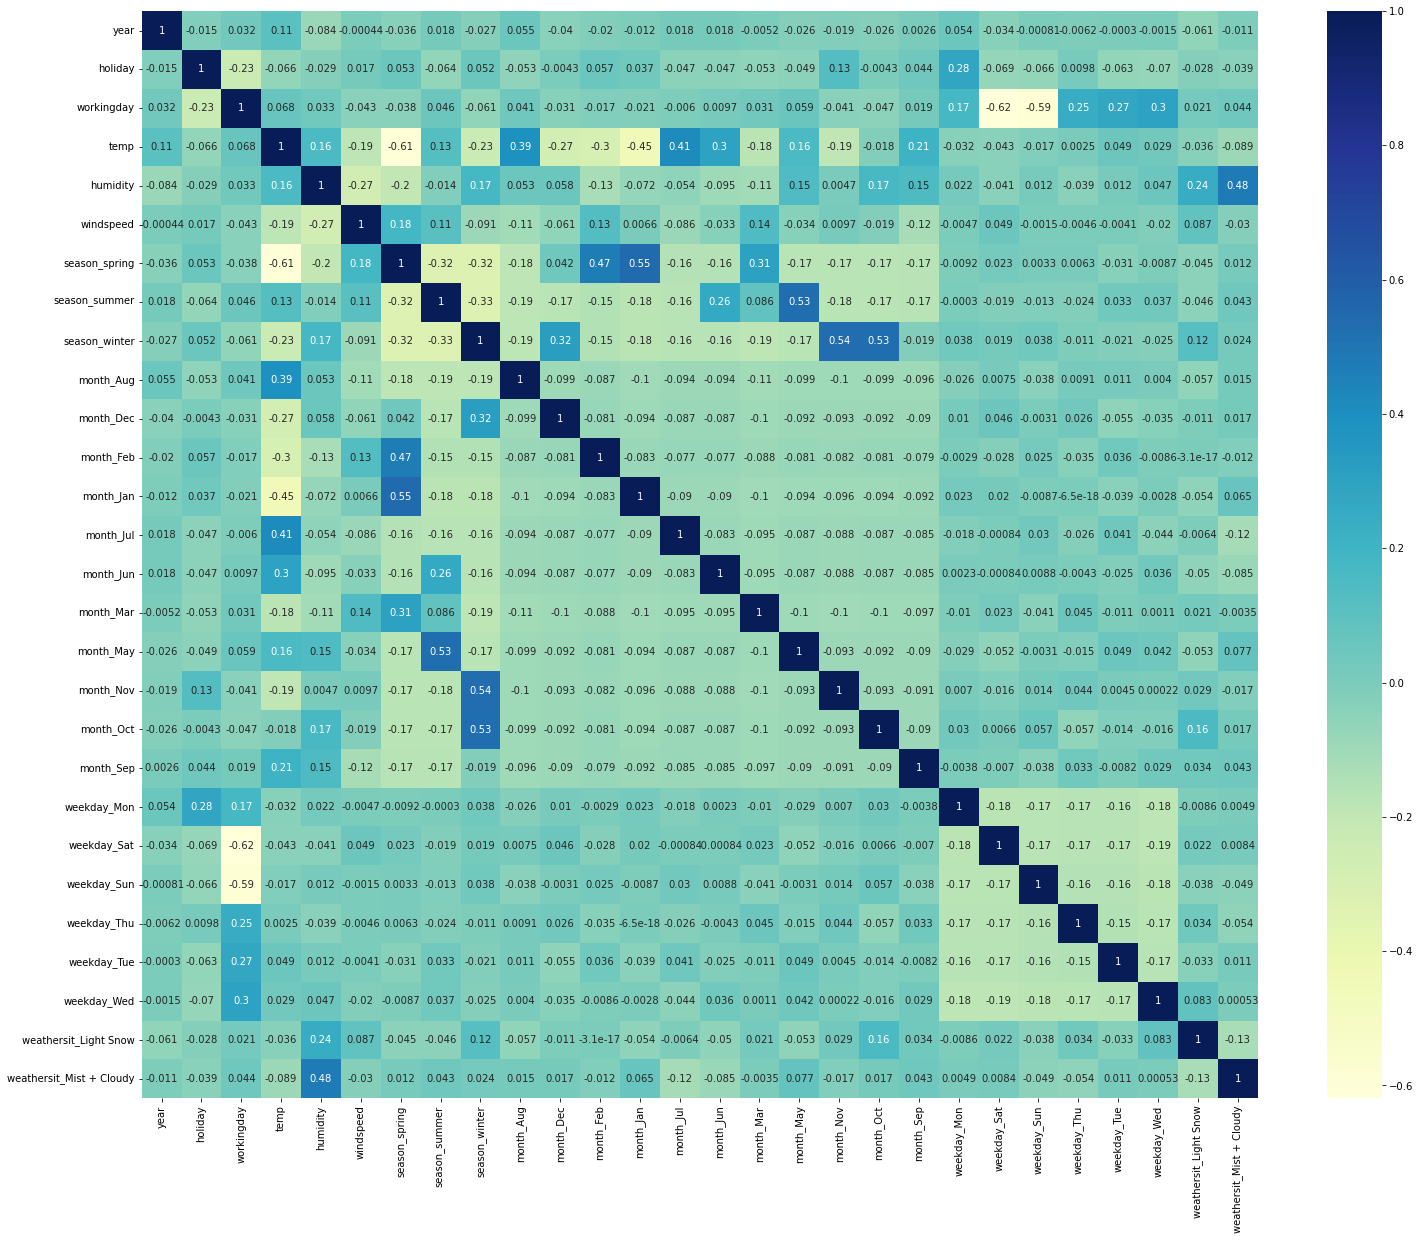

In [211]:
plt.figure(figsize = (25,20))
sns.heatmap(data_train.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

# Step4 : Building the Model

In [212]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [213]:
# importing RFE and Linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [214]:
model = LinearRegression()

In [215]:
model.fit(x_train, y_train)

LinearRegression()

In [216]:
rfe = RFE(model,15)

In [217]:
rfe = rfe.fit(x_train, y_train)

In [218]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 7),
 ('month_Dec', False, 4),
 ('month_Feb', False, 5),
 ('month_Jan', False, 2),
 ('month_Jul', True, 1),
 ('month_Jun', False, 11),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', False, 3),
 ('month_Oct', False, 10),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [219]:
# Selecting columns where the RFE support is True
selected_col = x_train.columns[rfe.support_]
selected_col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_Jul',
       'month_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [220]:
# Selecting the columns where the RFE factor is False
unselected_col = x_train.columns[~rfe.support_]
unselected_col

Index(['month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [221]:
# creating a new dataset with only selected columns
x_train_rfe = x_train[selected_col]

Whenever we are selecting a model 
- we have to choose to drop high p-value anf high VIF values 
- secondly high p=valve and low VIF values 
- Followed by low p-value and low VIF values for optimizing our model

In [222]:
import statsmodels.api as sm

In [223]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [224]:
x_train_rfe.head()

,const,year,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Jul,month_Sep,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


Running a Linear Model1

In [225]:
lm = sm.OLS(y_train, x_train_rfe).fit()

In [226]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 01 May 2022   Prob (F-statistic):          2.11e-191
Time:                        16:06:41   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Checking VIF

In [227]:
# Dropping the constant variable
x_train_rfe = x_train_rfe.drop(["const"], axis = 1)

In [228]:
# Caluculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_rfe
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
2                 workingday  50.68
11               weekday_Sat  12.20
12               weekday_Sun  11.79
6              season_spring   5.02
3                       temp   3.62
8              season_winter   3.49
1                    holiday   2.91
7              season_summer   2.62
4                   humidity   1.91
14  weathersit_Mist + Cloudy   1.57
9                  month_Jul   1.49
10                 month_Sep   1.30
13     weathersit_Light Snow   1.25
5                  windspeed   1.20
0                       year   1.03


In [229]:
#Linear regression Model2 
# Removing all the variables which have VIF > 5
x_train_new2 = x_train_rfe.drop(["workingday"], axis = 1)

In [230]:
x_train_new2 = sm.add_constant(x_train_new2)
lm2 = sm.OLS(y_train, x_train_new2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 01 May 2022   Prob (F-statistic):          2.11e-191
Time:                        16:06:41   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [231]:
# Dropping the constant variable
x_train_new2 = x_train_new2.drop(["const"], axis = 1)

In [232]:
# Caluculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new2
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
3                   humidity  28.25
2                       temp  16.06
4                  windspeed   4.68
5              season_spring   4.03
7              season_winter   3.36
6              season_summer   2.79
13  weathersit_Mist + Cloudy   2.30
0                       year   2.08
8                  month_Jul   1.59
9                  month_Sep   1.39
12     weathersit_Light Snow   1.24
10               weekday_Sat   1.23
11               weekday_Sun   1.23
1                    holiday   1.06


In [233]:
x_train_new3 = x_train_new2.drop(["humidity"], axis = 1)
x_train_new3 = sm.add_constant(x_train_new3)
lm3 = sm.OLS(y_train, x_train_new3).fit()
print(lm3.summary())
# Dropping the constant variable
x_train_new3 = x_train_new3.drop(["const"], axis = 1)
# Caluculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new3
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.28e-188
Time:                        16:06:41   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [234]:
x_train_new4 = x_train_new3.drop(["temp"], axis = 1)
x_train_new4 = sm.add_constant(x_train_new4)
lm4 = sm.OLS(y_train, x_train_new4).fit()
print(lm4.summary())
# Dropping the constant variable
x_train_new4 = x_train_new4.drop(["const"], axis = 1)
# Caluculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new4
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.68e-149
Time:                        16:06:41   Log-Likelihood:                 412.53
No. Observations:                 510   AIC:                            -799.1
Df Residuals:                     497   BIC:                            -744.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [235]:
# Dropping the July month as it has high p-value
x_train_new5 = x_train_new4.drop(["month_Jul"], axis = 1)
x_train_new5 = sm.add_constant(x_train_new5)
lm5 = sm.OLS(y_train, x_train_new5).fit()
print(lm5.summary())
# Dropping the constant variable
x_train_new5 = x_train_new5.drop(["const"], axis = 1)
# Caluculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new5
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.48e-150
Time:                        16:06:41   Log-Likelihood:                 412.43
No. Observations:                 510   AIC:                            -800.9
Df Residuals:                     498   BIC:                            -750.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [236]:
# Dropping the weekday_Sat as it has high p-value
x_train_new6 = x_train_new5.drop(["weekday_Sat"], axis = 1)
x_train_new6 = sm.add_constant(x_train_new6)
lm6 = sm.OLS(y_train, x_train_new6).fit()
print(lm6.summary())
# Dropping the constant variable
x_train_new6 = x_train_new6.drop(["const"], axis = 1)
# Caluculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new6
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.30e-151
Time:                        16:06:41   Log-Likelihood:                 412.28
No. Observations:                 510   AIC:                            -802.6
Df Residuals:                     499   BIC:                            -756.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [237]:
# Dropping the holiday as it has least vif
x_train_new7 = x_train_new6.drop(["holiday"], axis = 1)
x_train_new7 = sm.add_constant(x_train_new7)
lm7 = sm.OLS(y_train, x_train_new7).fit()
print(lm7.summary())
# Dropping the constant variable
x_train_new7 = x_train_new7.drop(["const"], axis = 1)
# Caluculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new7
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 01 May 2022   Prob (F-statistic):          3.77e-150
Time:                        16:06:41   Log-Likelihood:                 406.12
No. Observations:                 510   AIC:                            -792.2
Df Residuals:                     500   BIC:                            -749.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Residual Analysis of model

In [238]:
x_train_new6 = sm.add_constant(x_train_new6)
x_train_new6

,const,year,holiday,windspeed,season_spring,season_summer,season_winter,month_Sep,weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1.0,1,0,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,0,1
728,1.0,1,0,0.663106,1,0,0,0,1,0,0
482,1.0,1,0,0.188475,0,1,0,0,0,0,1
111,1.0,0,0,0.380981,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.111379,1,0,0,0,0,0,0
350,1.0,0,0,0.431816,0,0,1,0,0,0,1
79,1.0,0,0,0.529881,0,1,0,0,0,0,1


### lets consider model 6 to proceed

In [239]:
y_train_pred = lm6.predict(x_train_new6)

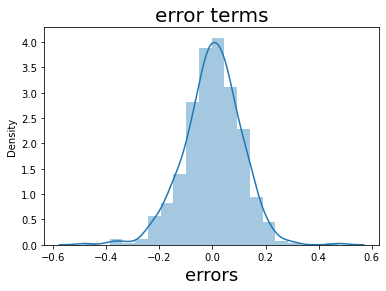

In [240]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("error terms", fontsize = 20)
plt.xlabel("errors", fontsize = 18)
plt.show()

In [241]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

In [242]:
print("Mean_Squared_Error :",mse)
print("r_square_vale :",r_squared)

Mean_Squared_Error : 0.011624451304262016
r_square_vale : 0.7687411143903743


In [243]:
num_vars = ["temp","humidity","windspeed","count"]
data_test[num_vars] = scaler.transform(data_test[num_vars])
# data_test.head()

In [244]:
data_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [245]:
# dividing into x test and y test
y_test = data_test.pop("count")
x_test = data_test
x_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
# x_train_new6 = x_train_new6.drop(["const"], axis = 1)
x_train_new6.columns
# x_train_new6 = sm.add_constant(x_train_new6)
# x_train_new6

Index(['year', 'holiday', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'month_Sep', 'weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [256]:
# using the model for making predictions
x_test_new = x_test[x_train_new6.columns]
x_test_new1 = sm.add_constant(x_test_new)

In [257]:
y_pred = lm6.predict(x_test_new1)

In [261]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7498923362336172

In [262]:
Adj_r2=1-(1-0.7790839400465187)*(10-1)/(10-1-1)
print(Adj_r2)

0.7514694325523336


### Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

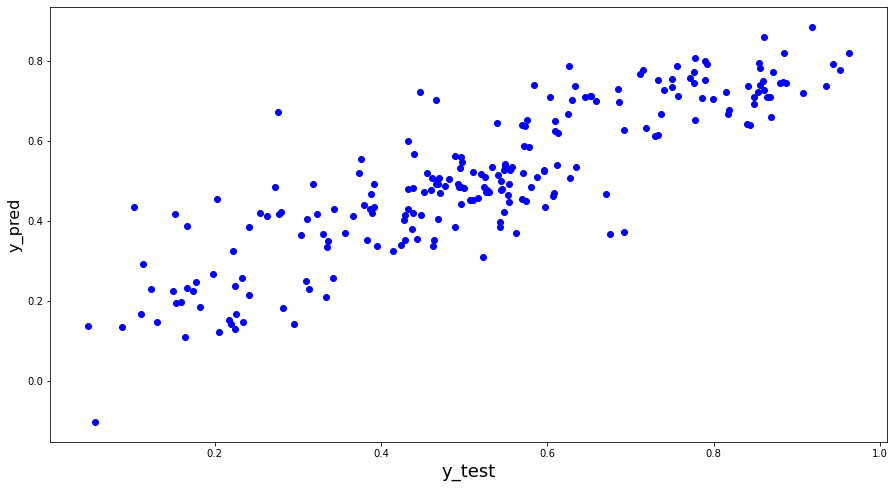

In [263]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

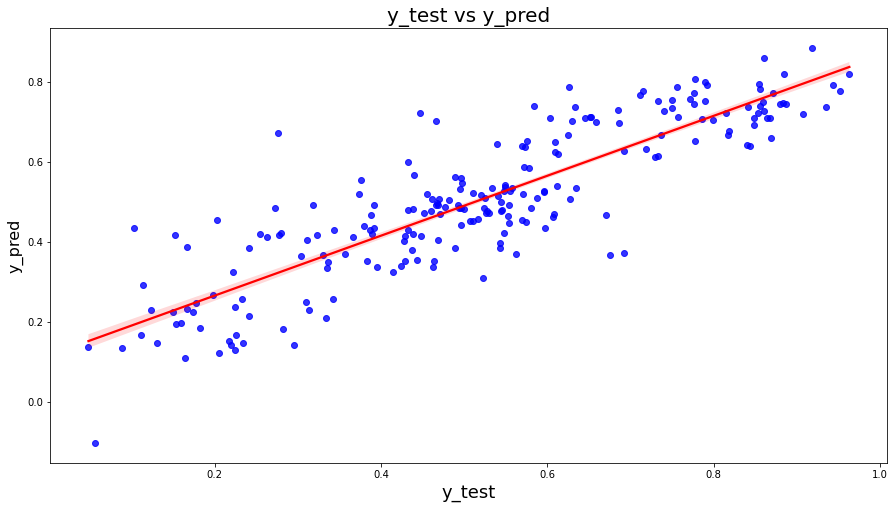

In [264]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Assumptions of Linear Regression:
- The error terms are normally distributed.
- The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
- The predicted values have linear relationship with the actual values.

Conclusion:
The top variables that are seen effecting and benefitting the Bike Rental count are as follows:

1. Spring season : -0.2988
2. Light Snow:-0.2964
3. Year : 0.2476
4. Sep : 0.0705
5. windspeed : -0.1723


- We arrived at a very decent model for the the demand for shared bikes with the significant variables
- We can see that Year variable is having the highest coefficient 0.2476, which means if the year changes from 2018 to 2019 the number of bike rentals increases by 0.2476units.

- We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist+cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit change in the independent variable while keeping other variables in the model constant.

Business Goals:

- Bike-sharing provider can focus more on Time for the business to pickup pace .
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 .
- The focus can be more on Summer & Winter season, August, September months, Weekends, Working days as they have good influence on bike rentals.
- We can focus on weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow , Spring seasons as they have negative coefficients and are negatively correlated to bike rentals. So we can offer seasonal offers there to increase the demand.